In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import math
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns

# Import and then remove duplicates of all the cities
everything = pd.read_csv('world-covid-data.csv', parse_dates=["date"])

In [2]:
everything

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127511,ZWE,Africa,Zimbabwe,2021-10-27,132808.0,84.0,53.000,4675.0,1.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127512,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127513,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127514,ZWE,Africa,Zimbabwe,2021-10-30,132926.0,0.0,48.286,4675.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
coords = pd.read_csv('lats-longs.csv')
everything2 = pd.merge(everything, coords, left_on='location',right_on='Country', how='left')

In [4]:
#Draws the map on the plot
def addmap():
    plt.xlim(-180, 180)
    plt.ylim(-90,90)
    img = plt.imread("worldmap.png")
    plt.imshow(img, extent=[-180, 180, -90, 90])

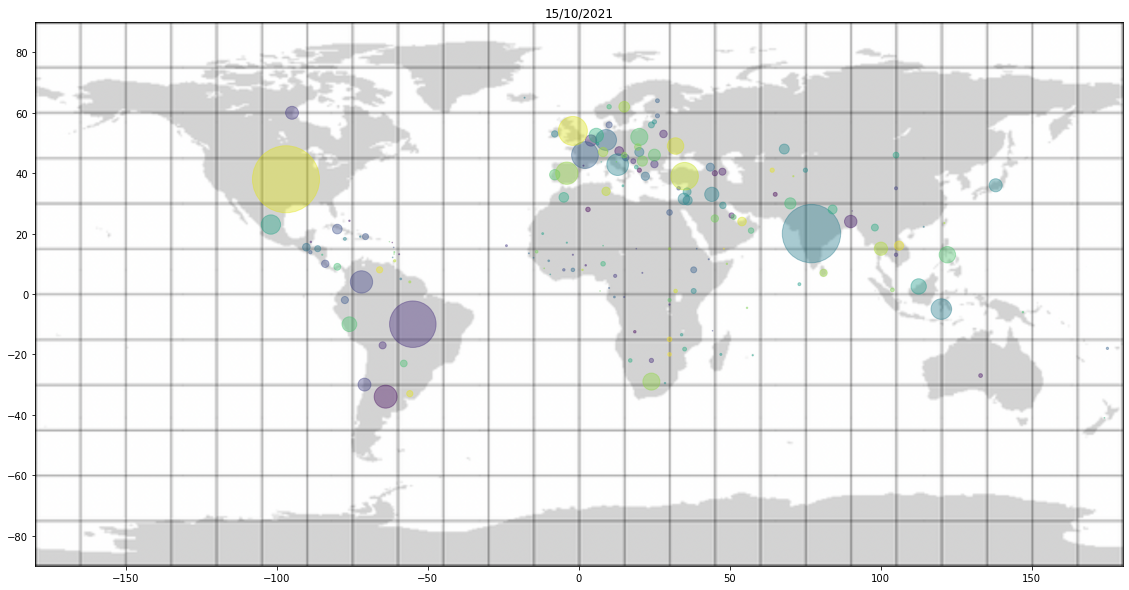

In [5]:
from matplotlib import animation
from IPython.display import clear_output
import calendar

dates = list(dict.fromkeys(list(everything2['date'])))
dates.sort()
everything2 = everything2.dropna(subset=['Latitude', 'Longitude'], how='all')
everything2=everything2.drop(everything2[everything2.location == 'Europe'].index)
everything2['colour'] = pd.factorize(everything2['location'])[0]

cases = np.zeros(len(everything2))
first = True

for i in dates:
    data = everything2.loc[everything2['date'] == i]
    
    if i.day == 1 or i.day == 15:
        clear_output(wait=True)
        plt.figure(figsize=(40,10))
        addmap()
        plt.scatter(
            x=data['Longitude'], 
            y=data['Latitude'], 
            s=data['total_cases']/10000,
            c = data['colour'],
            alpha=0.4
        )

        plt.title(i.strftime("%d/%m/%Y"))
        plt.show()



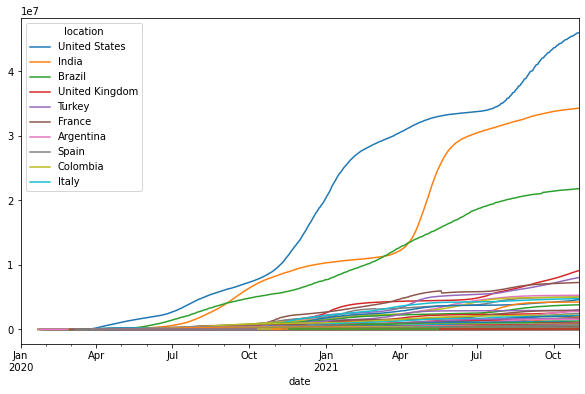

In [6]:
a = everything2.pivot(index="date", columns=["location"],values="total_cases")
b = a.sort_values(by=['2021-10-31'], ascending=False, axis=1)
b.iloc[:,0:10].plot(figsize=(10,6))
plt.plot(b.iloc[:,10:])

plt.show()

In [7]:
population = pd.read_csv('population.csv')
everything3 = pd.merge(everything2, population, left_on='iso_code',right_on='Country Code', how='left')

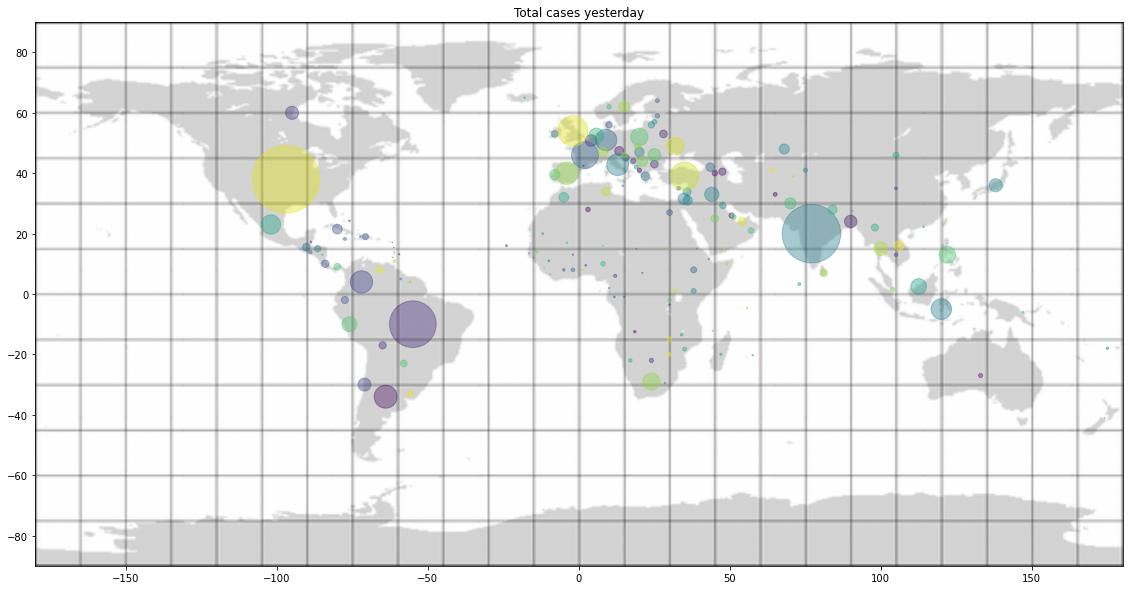

In [30]:
data = everything3.loc[everything3['date'] == '2021-10-31']

plt.figure(figsize=(40,10))
addmap()
plt.scatter(
    x=data['Longitude'], 
    y=data['Latitude'], 
    s=data['total_cases']/10000,
    c = data['colour'],
    alpha=0.4
)

plt.title('Total cases yesterday')
plt.show()


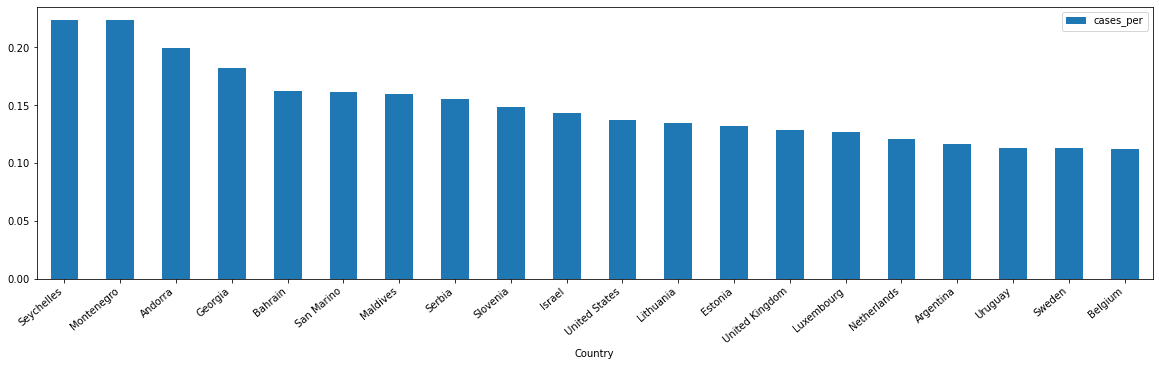

In [9]:
data = data.dropna(subset=['2020', 'total_cases'], how='all')
data['cases_per'] = data['total_cases']/data['2020']
data = data.sort_values(by=['cases_per'], ascending=False, axis=0)
data[:20].plot.bar(x='location', y='cases_per', rot=0, figsize=(20,5))
plt.xticks(rotation=40, ha='right')
plt.xlabel('Country')
plt.show()